In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten



In [48]:
data_path = 'date_data.csv'
df = pd.read_csv(data_path)

In [49]:
print(df.columns)

Index(['dt', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'power_consumption'],
      dtype='object')


In [50]:
df['dt'] = pd.to_datetime(df['dt'], format="%Y-%m-%d")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   dt                     1426 non-null   datetime64[ns]
 1   Global_active_power    1426 non-null   float64       
 2   Global_reactive_power  1426 non-null   float64       
 3   Voltage                1426 non-null   float64       
 4   Global_intensity       1426 non-null   float64       
 5   Sub_metering_1         1426 non-null   float64       
 6   Sub_metering_2         1426 non-null   float64       
 7   Sub_metering_3         1426 non-null   float64       
 8   power_consumption      1426 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 100.4 KB


In [52]:
df.describe()

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
count,1426,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000
mean,2008-12-13 12:00:00,1.077442,0.123239,240.835142,4.567550,1.109464,1.277929,6.406059,9.163919
min,2007-01-01 00:00:00,0.146000,0.000000,231.088229,0.600000,0.000000,0.000000,0.000000,1.433333
25%,2007-12-23 06:00:00,0.807992,0.098345,240.065377,3.484028,0.402604,0.298611,4.595486,6.443287
50%,2008-12-13 12:00:00,1.065741,0.118883,240.962701,4.520000,0.771181,0.472569,6.427431,8.675787
75%,2009-12-04 18:00:00,1.309216,0.141284,241.881823,5.517917,1.527778,1.883681,8.135764,11.413744
max,2010-11-26 00:00:00,2.798418,0.290162,247.435007,11.815972,7.794444,8.409028,19.000000,27.972639
std,NaN,0.408821,0.035139,2.049902,1.690637,1.103123,1.444686,2.647284,3.988913


In [53]:
print(len(df))
df.head()

1426


,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
0,2007-01-01,1.909031,0.102893,240.128979,7.916944,0.000000,0.244444,4.083333,27.489398
1,2007-01-02,0.881414,0.132182,241.943778,3.714028,0.000000,0.241667,4.556944,9.891620
2,2007-01-03,0.704204,0.136617,243.557090,3.014028,0.000000,0.238889,3.309028,8.188819
3,2007-01-04,2.263481,0.140487,239.750299,9.478194,0.729861,5.275694,7.566667,24.152454
4,2007-01-05,1.884281,0.120246,240.495764,7.885139,1.029861,0.263194,5.279167,24.832454


In [54]:
n = len(df)
train = df[:int(n*0.7)]
val = df[int(n*0.7):int(n*0.85)]
test = df[int(n*0.85):]


In [55]:
X_train, y_train = train.drop('Global_active_power', axis=1), train['Global_active_power']
X_val, y_val = val.drop('Global_active_power', axis=1), val['Global_active_power']
X_test, y_test = test.drop('Global_active_power', axis=1), test['Global_active_power']

# Drop the 'dt' column
X_train = X_train.drop('dt', axis=1)
X_val = X_val.drop('dt', axis=1)
X_test = X_test.drop('dt', axis=1)

# Reshape the data to fit LSTM input shape
num_features = X_train.shape[1]
X_train = X_train.values.reshape((X_train.shape[0], 1, num_features))
X_val = X_val.values.reshape((X_val.shape[0], 1, num_features))
X_test = X_test.values.reshape((X_test.shape[0], 1, num_features))

In [56]:
cnn_model = Sequential()

# Thêm lớp đầu vào
cnn_model.add(InputLayer((1, num_features)))

# Thêm lớp Conv1D
cnn_model.add(Conv1D(64, kernel_size=1, activation='relu'))

# Thêm lớp Flatten để chuyển đổi tensor 3D thành tensor 2D
cnn_model.add(Flatten())

# Thêm lớp Dense cuối cùng
cnn_model.add(Dense(1))

# Biên dịch mô hình
cnn_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[MeanAbsoluteError()])

# Huấn luyện mô hình, sử dụng tập validation
cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2512.0522 - mean_absolute_error: 50.0765 - val_loss: 2004.0031 - val_mean_absolute_error: 44.7612
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1774.3827 - mean_absolute_error: 42.0803 - val_loss: 1381.6855 - val_mean_absolute_error: 37.1666
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1214.5469 - mean_absolute_error: 34.8076 - val_loss: 923.8163 - val_mean_absolute_error: 30.3903
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 802.7047 - mean_absolute_error: 28.2934 - val_loss: 594.5445 - val_mean_absolute_error: 24.3797
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 510.4098 - mean_absolute_error: 22.5549 - val_loss: 362.0365 - val_mean_absolute_error: 19.0239
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 307.8002 - mean_absolute_error: 17.5078 - val_loss: 211.2592 - val_mean_absolute_error: 14.5314
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 177.1275 - mean_absolute

In [57]:
# Đánh giá mô hình trên tập kiểm tra
test_loss, test_mae = cnn_model.evaluate(X_test, y_test, verbose=0)

print(f"Độ lỗi trên tập kiểm tra: {test_loss}")
print(f"Độ chính xác trên tập kiểm tra: {test_mae}")

# Dự đoán giá trị trên tập kiểm tra
predictions = cnn_model.predict(X_test)

# Tính toán Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Absolute Error: {mae}")



Độ lỗi trên tập kiểm tra: 0.027396176010370255
Độ chính xác trên tập kiểm tra: 0.11182469874620438
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Mean Absolute Error: 0.11182470370994234


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step


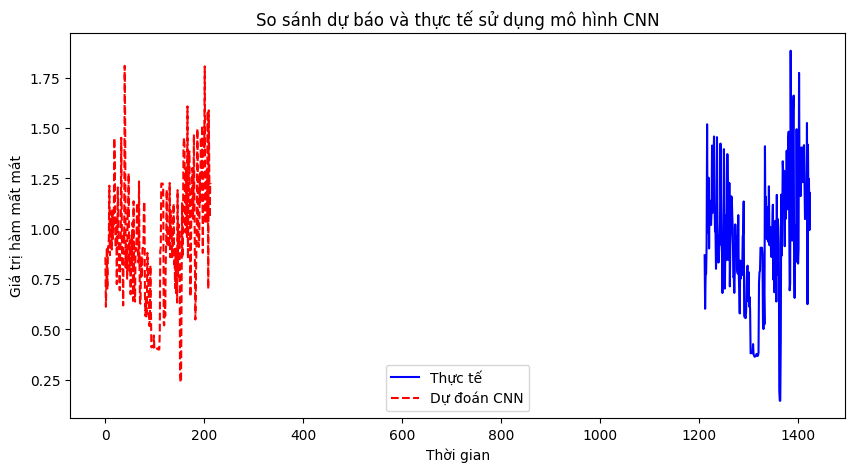

In [58]:
import matplotlib.pyplot as plt

# Dự đoán giá trị trên tập kiểm tra
predictions = cnn_model.predict(X_test)

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))

# Vẽ giá trị thực tế
plt.plot(y_test, label='Thực tế', color='blue')

# Vẽ kết quả dự đoán từ mô hình CNN
plt.plot(predictions, label='Dự đoán CNN', color='red', linestyle='--')

plt.title('So sánh dự báo và thực tế sử dụng mô hình CNN')
plt.xlabel('Thời gian')
plt.ylabel('Giá trị hàm mất mát')
plt.legend()
plt.show()


In [59]:
from tensorflow.keras.layers import LSTM

# Khởi tạo mô hình
modelCNNLSTM = Sequential()

# Thêm lớp đầu vào
modelCNNLSTM.add(InputLayer((1, num_features)))

# Thêm lớp Conv1D
modelCNNLSTM.add(Conv1D(64, kernel_size=1, activation='relu'))

# Thêm lớp LSTM
modelCNNLSTM.add(LSTM(32))

# Thêm lớp Dense cuối cùng
modelCNNLSTM.add(Dense(1))

# Biên dịch mô hình
modelCNNLSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[MeanAbsoluteError()])

# Huấn luyện mô hình, sử dụng tập validation
modelCNNLSTM.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.4367 - mean_absolute_error: 1.1172 - val_loss: 1.5528 - val_mean_absolute_error: 1.2091
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1214 - mean_absolute_error: 0.9615 - val_loss: 0.4457 - val_mean_absolute_error: 0.5981
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3383 - mean_absolute_error: 0.4530 - val_loss: 0.2615 - val_mean_absolute_error: 0.4384
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1949 - mean_absolute_error: 0.3367 - val_loss: 0.1122 - val_mean_absolute_error: 0.2577
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1597 - mean_absolute_error: 0.3102 - val_loss: 0.1046 - val_mean_absolute_error: 0.2478
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1564 - mean_absolute_error: 0.3038 - val_loss: 0.1091 - val_mean_absolute_error: 0.2546
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1429 - mean_absolute_error: 0.2898 - val_loss: 0.09

In [60]:
# Đánh giá mô hình trên tập kiểm tra
test_loss, test_mae = modelCNNLSTM.evaluate(X_test, y_test, verbose=0)

print(f"Độ lỗi trên tập kiểm tra: {test_loss}")
print(f"Độ chính xác trên tập kiểm tra: {test_mae}")

# Dự đoán giá trị trên tập kiểm tra
predictions = modelCNNLSTM.predict(X_test)

# Tính toán Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Absolute Error: {mae}")



Độ lỗi trên tập kiểm tra: 0.0018565135542303324
Độ chính xác trên tập kiểm tra: 0.030892234295606613
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Mean Absolute Error: 0.03089223376616691


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step


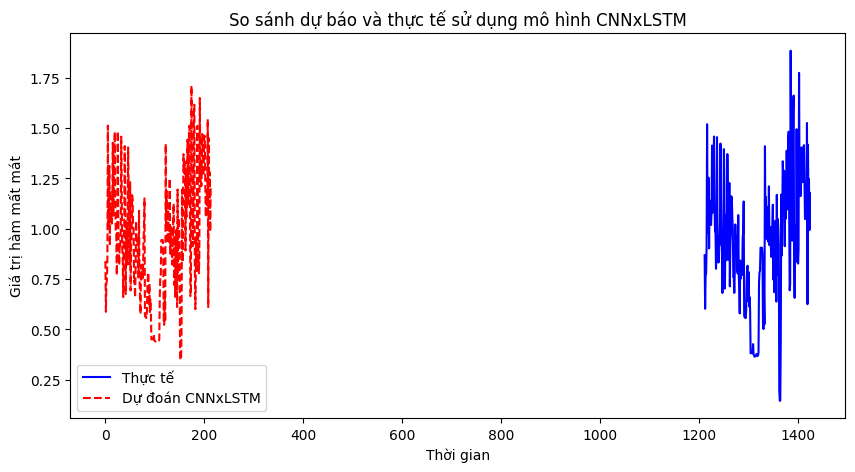

In [62]:
import matplotlib.pyplot as plt

# Dự đoán giá trị trên tập kiểm tra
predictions = modelCNNLSTM.predict(X_test)

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))

# Vẽ giá trị thực tế
plt.plot(y_test, label='Thực tế', color='blue')

# Vẽ kết quả dự đoán từ mô hình CNN
plt.plot(predictions, label='Dự đoán CNNxLSTM', color='red', linestyle='--')

plt.title('So sánh dự báo và thực tế sử dụng mô hình CNNxLSTM')
plt.xlabel('Thời gian')
plt.ylabel('Giá trị hàm mất mát')
plt.legend()
plt.show()
